<a href="https://colab.research.google.com/github/djgnatzy/MakeAIWork2/blob/temp_test/apple_disease_classification_augmentated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/data'

/content/drive/.shortcut-targets-by-id/1DQIzo_cjXQXSNKb7CeB7ipGp5aysmbbs/data


# Image classification

## Setup

Import TensorFlow and other necessary libraries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
keras = tf.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

import random

## Download and explore the dataset

In [ ]:
import pathlib
data_dir = '/content/drive/My Drive/data/train' 
data_dir = pathlib.Path(data_dir) 

After downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

380


Here are some roses:

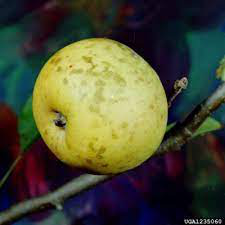

In [ ]:
blotches = list(data_dir.glob('Blotch_Apple/*'))
PIL.Image.open(str(blotches[45]))

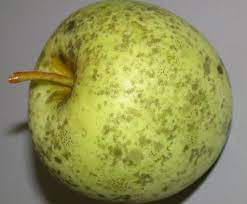

In [ ]:
PIL.Image.open(str(blotches[23]))

And some scabs:

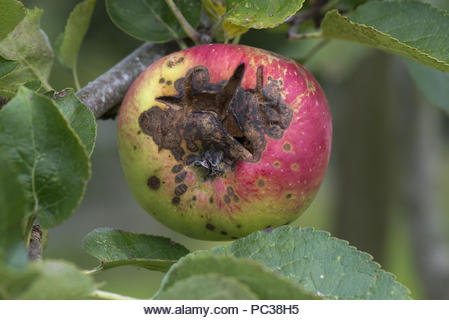

In [ ]:
scabs = list(data_dir.glob('Scab_Apple/*'))
PIL.Image.open(str(scabs[0]))

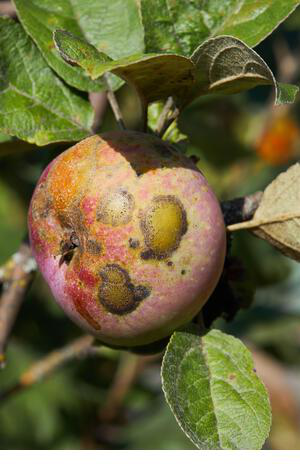

In [ ]:
PIL.Image.open(str(scabs[48]))

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 240
img_width = 240

In [ ]:
data_dir = '/content/drive/MyDrive/data/train'

It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 383 files belonging to 4 classes.
Using 307 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 383 files belonging to 4 classes.
Using 76 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


## Visualize the data

Here are the first nine images from the training dataset:

In [ ]:
# plt.figure(figsize=(15, 15))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 360, 360, 3)
(32,)


# Importeer tevens de test data

In [ ]:
test_dir = '/content/drive/My Drive/data/test'
test_dir = pathlib.Path(test_dir) 

image_count = len(list(test_dir.glob('*/*.jpg')))
print(image_count)

119


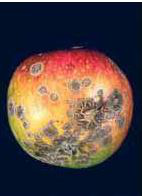

In [ ]:
blotchez = list(test_dir.glob('Blotch_Apple/*'))
PIL.Image.open(str(blotchez[4]))

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 4 classes.


In [ ]:
class_names = test_ds.class_names
# print(class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [ ]:
# plt.figure(figsize=(15, 15))
# for images, labels in test_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 360, 360, 3)
(32,)


## Standardize the dataset

In [ ]:
normalization_layer = layers.Rescaling(1./255)

# Augment the dataset

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    # layers.RandomZoom(0.2)
  ]
)

# print(type(data_augmentation))

Visualize a few augmented examples by applying data augmentation to the same image several times:

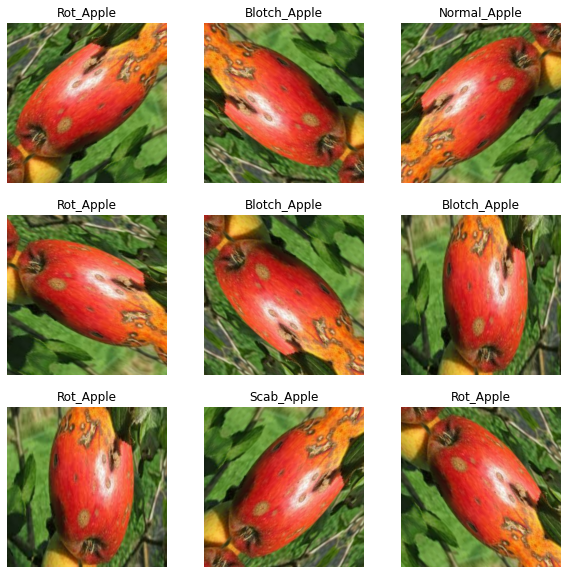

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, training=True)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

    # for i in range(16):
    #     plt.subplot(4, 4, i+1)
    #     plt.xticks([])
    #     plt.yticks([])
    #     plt.grid(False)
    #     randomImage = random.randint(1, 848)
    #     plt.imshow(imageObjects[randomImage])
    #     plt.xlabel(labelNames[labelNumbers[randomImage]]) 

In [ ]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(images, 0), tf.float32)

You will add data augmentation to your model before training in the next step.

## Batch Normalization

In [ ]:
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=False,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
)

# minus **kwargs

# Experiment with Dropout

# Optimized Keras model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
10/10 [==============================] - 51s 5s/step - loss: 5.0628 - accuracy: 0.3062 - val_loss: 1.4835 - val_accuracy: 0.2105
Epoch 2/15
10/10 [==============================] - 48s 5s/step - loss: 1.2980 - accuracy: 0.3746 - val_loss: 1.2452 - val_accuracy: 0.5263
Epoch 3/15
10/10 [==============================] - 48s 5s/step - loss: 1.1051 - accuracy: 0.5570 - val_loss: 1.2043 - val_accuracy: 0.4474
Epoch 4/15
10/10 [==============================] - 47s 5s/step - loss: 0.9773 - accuracy: 0.6091 - val_loss: 1.1250 - val_accuracy: 0.5526
Epoch 5/15
10/10 [==============================] - 51s 5s/step - loss: 0.9013 - accuracy: 0.6384 - val_loss: 1.1562 - val_accuracy: 0.5658
Epoch 6/15
10/10 [==============================] - 48s 5s/step - loss: 0.8754 - accuracy: 0.6450 - val_loss: 1.1718 - val_accuracy: 0.5526
Epoch 7/15
10/10 [==============================] - 45s 4s/step - loss: 0.8173 - accuracy: 0.6808 - val_loss: 1.1045 - val_accuracy: 0.5395
Epoch 8/15
10/10 [==

In [ ]:
print(len(history.history['loss']))

In [ ]:
model.save("models_saved/model_adc.h5", overwrite=True, include_optimizer=True)

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

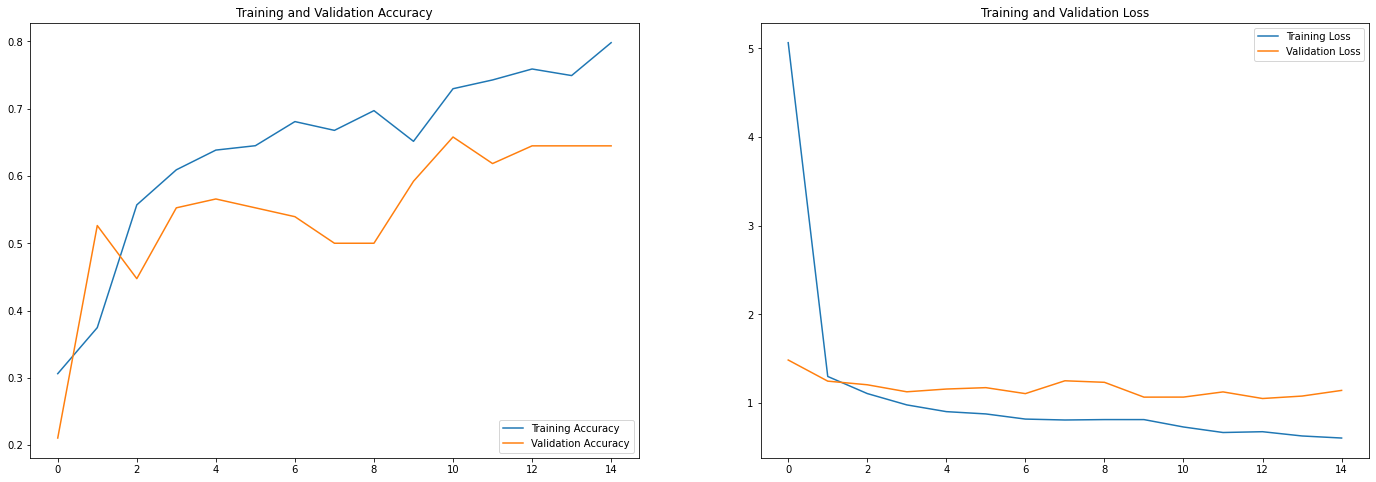

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

Use your model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation and dropout layers are inactive at inference time.

In [ ]:
model.predict(test_ds)

4/4 [==============================] - 7s 1s/step


array([[-8.20926800e-02,  1.32436175e-02,  5.47611043e-02,
         2.46512610e-02],
       [-6.84856474e-02, -1.65156927e-02,  3.08172647e-02,
         3.39953303e-02],
       [-9.09335315e-02,  1.83702707e-02,  6.71760067e-02,
        -6.66849315e-04],
       [-1.47102386e-01,  7.43609816e-02,  8.26653913e-02,
         9.03580412e-02],
       [-5.91625795e-02,  1.13032162e-01,  7.73230493e-02,
         8.94597843e-02],
       [-7.86255151e-02, -1.89865623e-02,  6.33545220e-02,
         2.80701891e-02],
       [-9.89973918e-02,  5.17237782e-02,  6.80863261e-02,
         5.51959500e-02],
       [-8.84628892e-02,  1.51977673e-01,  1.07806161e-01,
         6.56200945e-02],
       [-1.10777646e-01,  2.73550078e-02,  5.01464009e-02,
         4.40163799e-02],
       [-6.34818822e-02,  9.35355723e-02,  4.83467206e-02,
         9.75609720e-02],
       [-1.28654405e-01, -7.65661651e-04,  8.18148106e-02,
         5.35680465e-02],
       [-5.10206521e-02, -2.06201710e-03,  6.00079820e-02,
      

In [ ]:
sunflower_url = "https://pngimg.com/uploads/apple/apple_PNG12489.png"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 190ms/step
This image most likely belongs to Scab_Apple with a 25.92 percent confidence.


In [ ]:
model.predict(test_ds)

4/4 [==============================] - 5s 978ms/step


array([[ 1.36561811e+00, -4.14573029e-02, -4.70430404e-02,
         2.80561781e+00],
       [ 1.74423611e+00, -1.78614163e+00,  1.18325639e+00,
         2.36678869e-01],
       [-6.59439504e-01,  6.70798063e+00, -1.38889527e+00,
         1.76236877e+01],
       [ 3.20867586e+00, -1.95915639e+00, -9.87637788e-02,
         6.56183660e-01],
       [ 2.43627191e+00, -6.19840562e-01,  5.17021567e-02,
         1.14121425e+00],
       [ 1.13173413e+00,  1.41359365e+00, -5.46481490e-01,
         7.65483189e+00],
       [ 2.84809661e+00, -8.32386255e-01,  8.48991722e-02,
         7.02370942e-01],
       [ 1.79609489e+00, -1.81254536e-01, -1.70965219e+00,
         7.24929857e+00],
       [ 3.06665421e+00, -4.85281110e-01, -2.92388767e-01,
         9.33513939e-01],
       [ 4.76030302e+00, -5.70014775e-01, -1.84050221e-02,
         2.74072409e+00],
       [ 1.75835311e+00, -2.76044130e-01,  4.31147635e-01,
         1.20676160e+00],
       [ 6.98984742e-01,  4.14415312e+00,  1.39459923e-01,
      

In [ ]:
predictionBatch = model.predict(test_ds)
predictionEnhanced = tf.argmax(predictionBatch, axis=-1)
actualCategories = tf.concat([y for x, y in test_ds], axis=0)

# argmax van np. omgezet naar tf.
# actualCategories / tf.concat toegevoegd


NameError: ignored

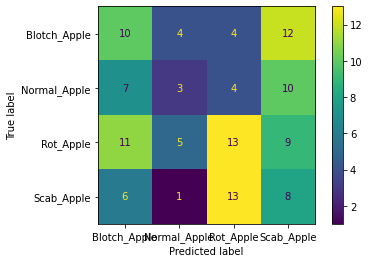

In [ ]:
confusionMatrix = metrics.confusion_matrix(actualCategories, predictionEnhanced)

cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ["Blotch_Apple", "Normal_Apple", "Rot_Apple", "Scab_Apple"])

cmDisplay.plot()

plt.show()